### **DATA LOAD**

In [1]:
import pandas as pd

In [7]:
pickle_data = pd.read_pickle("/Users/florian/Documents/GitHub/4 Semester/APPD/Analyse_von_Prozessdaten/Paul/Train.pkl")

In [13]:
df = pickle_data.reset_index(drop= True).drop(["Unnamed: 0"], axis= 1)

In [18]:
df = df.fillna(0)

### **PCA**

In [15]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

In [20]:
df_train_slice = df.drop(["timestamp", "DeviationID ValueY"], axis= 1)

In [21]:
pca = PCA()
pca.fit(df_train_slice)

PCA()

In [22]:
df_pca= pd.DataFrame(pca.explained_variance_ratio_)

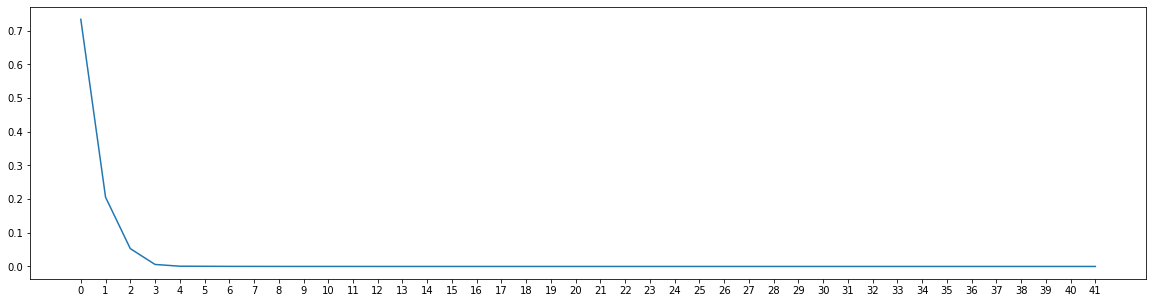

In [23]:
plt.figure(figsize= (20, 5))
plt.plot(df_pca)
plt.xticks(df_pca.index)
plt.show()

In [24]:
pc_train = PCA(n_components= 4).fit(df_train_slice)
df_train = pc_train.transform(df_train_slice)

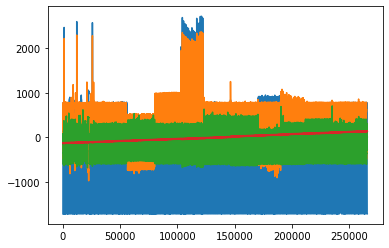

In [25]:
plt.plot(df_train)

### **SCALING**

In [27]:
from tslearn.preprocessing import TimeSeriesResampler
from sklearn.model_selection import train_test_split
from tslearn.preprocessing import TimeSeriesScalerMeanVariance

In [31]:
train_resampled = TimeSeriesResampler(sz= 150).fit_transform(df_train)

In [33]:
train_resampled.shape

(265998, 150, 1)

In [32]:
X = train_resampled
y = df_train

In [30]:
X_train, y_train, X_test, y_test = train_test_split()

array([[[-1720.43644517],
        [-1691.14449572],
        [-1661.85254626],
        ...,
        [ -118.87318127],
        [ -121.62451974],
        [ -124.3758582 ]],

       [[-1720.23588779],
        [-1690.951221  ],
        [-1661.6665542 ],
        ...,
        [ -118.85888742],
        [ -121.62174117],
        [ -124.38459493]],

       [[-1716.25122853],
        [-1687.10851372],
        [-1657.96579892],
        ...,
        [ -118.55262947],
        [ -121.53976233],
        [ -124.5268952 ]],

       ...,

       [[-1719.41017902],
        [-1690.11038025],
        [-1660.81058147],
        ...,
        [  134.73004882],
        [  137.23656807],
        [  139.74308731]],

       [[-1719.41065828],
        [-1690.11083747],
        [-1660.81101666],
        ...,
        [  134.71190952],
        [  137.21808362],
        [  139.72425772]],

       [[-1719.43714301],
        [-1690.13637045],
        [-1660.8355979 ],
        ...,
        [  134.71018916],
        [  137.